Percobaan Pembelajaran Machine Learning Keindra Bagas Maulana

# Import library yang diperlukan

- `from zipfile import ZipFile`: Library untuk bekerja dengan file zip.
- `import os`: Library untuk berinteraksi dengan sistem operasi.
- `import random`: Library untuk menghasilkan angka acak.
- `import numpy as np`: Library untuk operasi numerik.
- `import tensorflow as tf`: Library TensorFlow untuk pembelajaran mesin.
- `from tensorflow import keras`: API Keras untuk TensorFlow.
- `from tensorflow.keras import layers`: Modul untuk mendefinisikan lapisan model.
- `from tensorflow.keras.preprocessing.image import ImageDataGenerator`: Modul untuk augmentasi dan preprocessing data gambar.
- `from tensorflow.keras.callbacks import EarlyStopping`: Callback untuk menghentikan pelatihan model secara dini.
- `import matplotlib.pyplot as plt`: Library untuk membuat grafik dan menampilkan gambar.
- `from sklearn.model_selection import train_test_split`: Library untuk membagi dataset menjadi data pelatihan dan pengujian.


In [40]:
# Import necessary libraries
from zipfile import ZipFile  # Library for working with zip files
import os  # Library for interacting with the operating system
import random  # Library for generating random numbers
import numpy as np  # Library for numerical operations
import tensorflow as tf  # TensorFlow library for machine learning
from tensorflow import keras  # Keras API for TensorFlow
from tensorflow.keras import layers  # Layers module for defining model layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Image data augmentation and preprocessing
from tensorflow.keras.callbacks import EarlyStopping  # Callback for early stopping during model training
import matplotlib.pyplot as plt  # Library for plotting graphs and images
from sklearn.model_selection import train_test_split  # Library for splitting datasets into training and testing sets

# The above libraries are imported to perform various tasks such as data loading, model building, data preprocessing, and visualization.

# Ekstraksi Dataset

Pada bagian ini, dilakukan ekstraksi dataset dari file zip yang disediakan ke dalam direktori dataset. Langkah-langkahnya adalah sebagai berikut:

1. `direktori_dataset = 'dataset'`: Variabel `direktori_dataset` digunakan untuk menentukan direktori tempat dataset akan diekstraksi.

2. `nama_file_target = 'data/rockpaperscissors.zip'`: Variabel `nama_file_target` berisi path relatif menuju file zip yang berisi dataset.

3. `ekstraksi = zipfile.ZipFile(nama_file_target, 'r')`: Objek `ZipFile` dibuat dengan menggunakan nama file target untuk ekstraksi dan mode 'r' untuk membaca (read).

4. `ekstraksi.extractall(direktori_dataset)`: Semua isi dari file zip diekstraksi dan disimpan dalam direktori yang telah ditentukan sebelumnya.

5. `ekstraksi.close()`: File zip ditutup setelah proses ekstraksi selesai.

# Definisi Path untuk Masing-Masing Kategori

Pada bagian ini, path untuk setiap kategori (kertas, batu, gunting) dalam dataset didefinisikan. Langkah-langkahnya adalah sebagai berikut:

1. `basis_direktori = 'dataset/rockpaperscissors/rps-cv-images'`: Variabel `basis_direktori` berisi path relatif menuju direktori yang berisi gambar-gambar dari setiap kategori.

2. `paper_direktori = os.path.join(basis_direktori, 'paper')`: Variabel `paper_direktori` berisi path menuju direktori kategori kertas. Fungsi `os.path.join()` digunakan untuk menggabungkan `basis_direktori` dengan nama kategori.

3. `rock_direktori = os.path.join(basis_direktori, 'rock')`: Variabel `rock_direktori` berisi path menuju direktori kategori batu. Sama seperti sebelumnya, `os.path.join()` digunakan untuk menggabungkan `basis_direktori` dengan nama kategori.

4. `scissors_direktori = os.path.join(basis_direktori, 'scissors')`: Variabel `scissors_direktori` berisi path menuju direktori kategori gunting. Seperti sebelumnya, `os.path.join()` digunakan untuk menggabungkan `basis_direktori` dengan nama kategori.


In [41]:
# Ekstraksi dataset dari file zip yang disediakan ke dalam direktori dataset
direktori_dataset = 'dataset'
nama_file_target = 'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'ekstraksi = zipfile.ZipFile(nama_file_target, 'r')
ekstraksi.extractall(direktori_dataset)
ekstraksi.close()

# Definisi path untuk masing-masing kategori (kertas, batu, gunting) dalam dataset
basis_direktori = 'dataset/rockpaperscissors/rps-cv-images'
paper_direktori = os.path.join(basis_direktori, 'paper')  # Path untuk kategori kertas
rock_direktori = os.path.join(basis_direktori, 'rock')  # Path untuk kategori batu
scissors_direktori = os.path.join(basis_direktori, 'scissors')  # Path untuk kategori gunting

# Menghitung Jumlah Gambar untuk Setiap Kategori

- `print("Jumlah gambar batu: ", len(os.listdir(rock_direktori)))`: Menghitung jumlah gambar dalam direktori kategori "batu" dengan menggunakan fungsi `os.listdir()` untuk mendapatkan daftar file dalam direktori, dan kemudian menghitung panjang daftar tersebut dengan `len()`.

- `print("Jumlah gambar kertas: ", len(os.listdir(paper_direktori)))`: Menghitung jumlah gambar dalam direktori kategori "kertas" dengan cara yang sama seperti sebelumnya.

- `print("Jumlah gambar gunting: ", len(os.listdir(scissors_direktori)))`: Menghitung jumlah gambar dalam direktori kategori "gunting" dengan cara yang sama seperti sebelumnya.


In [12]:
print("Jumlah gambar batu: ", len(os.listdir(rock_direktori)))
print("Jumlah gambar kertas: ", len(os.listdir(paper_direktori)))
print("Jumlah gambar gunting: ", len(os.listdir(scissors_direktori)))

Jumlah gambar batu:  726
Jumlah gambar kertas:  712
Jumlah gambar gunting:  750


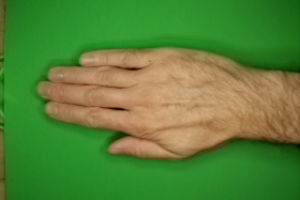

In [14]:
import tensorflow as tf
import random
import os

random_image = random.sample(os.listdir(paper_direktori), 1)
img = tf.keras.utils.load_img(f"{paper_direktori}/{random_image[0]}")
img


In [15]:
img = tf.keras.utils.img_to_array(img)
img.shape

(200, 300, 3)

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  basis_direktori,
  validation_split=0.4,
  subset="training",
  image_size=(180,180),
  batch_size=32,
  seed=42)

Found 2188 files belonging to 3 classes.
Using 1313 files for training.


In [18]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  basis_direktori,
  validation_split=0.4,
  subset="validation",
  image_size=(180,180),
  batch_size=32,
  seed=42)

Found 2188 files belonging to 3 classes.
Using 875 files for validation.


In [19]:
class_names = train_ds.class_names
class_names

['paper', 'rock', 'scissors']

In [20]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


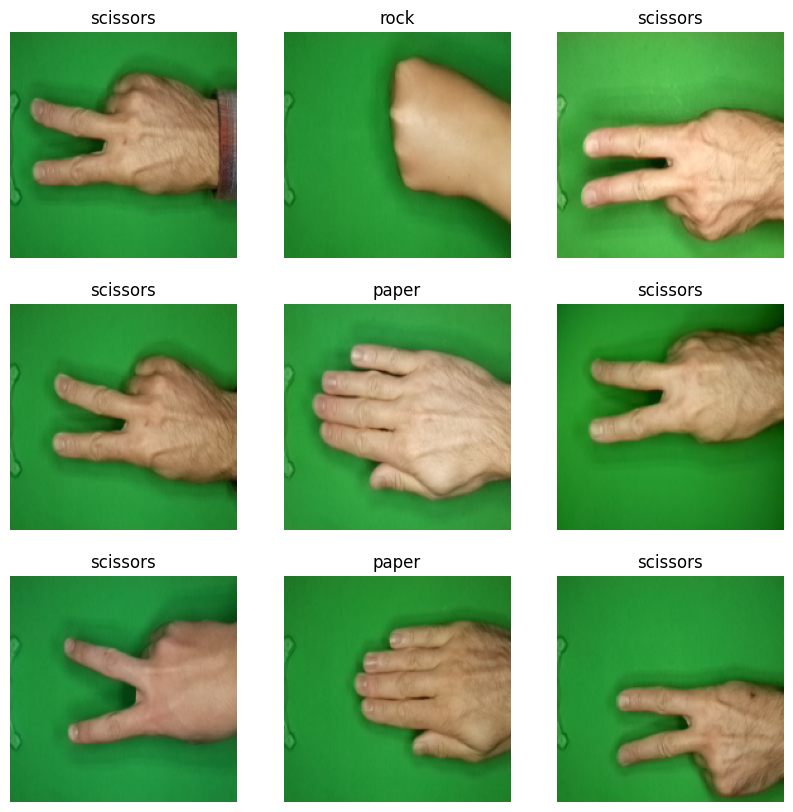

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical", seed=42),
  tf.keras.layers.RandomRotation(0.1, seed=42),
])

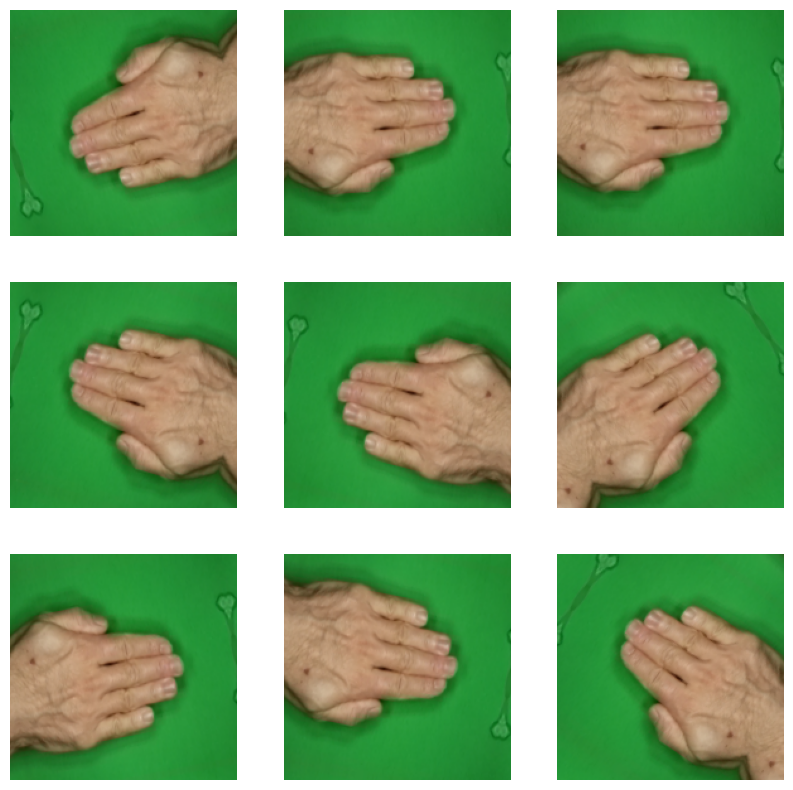

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

In [24]:
NUM_CLASSES = len(class_names)
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    data_augmentation,
    # The first CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The second CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The third CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The fourth CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES)
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                 

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15,
)

Epoch 1/15


42/42 [==============================] - 87s 2s/step - loss: 1.1191 - accuracy: 0.3503 - val_loss: 1.0923 - val_accuracy: 0.2983
Epoch 2/15
42/42 [==============================] - 84s 2s/step - loss: 0.8427 - accuracy: 0.5842 - val_loss: 0.4075 - val_accuracy: 0.8629
Epoch 3/15
42/42 [==============================] - 84s 2s/step - loss: 0.4431 - accuracy: 0.8370 - val_loss: 0.2527 - val_accuracy: 0.9131
Epoch 4/15
42/42 [==============================] - 83s 2s/step - loss: 0.3102 - accuracy: 0.8736 - val_loss: 0.2131 - val_accuracy: 0.9246
Epoch 5/15
42/42 [==============================] - 86s 2s/step - loss: 0.2450 - accuracy: 0.9071 - val_loss: 0.1349 - val_accuracy: 0.9611
Epoch 6/15
42/42 [==============================] - 87s 2s/step - loss: 0.2324 - accuracy: 0.9078 - val_loss: 0.0991 - val_accuracy: 0.9691
Epoch 7/15
42/42 [==============================] - 84s 2s/step - loss: 0.2176 - accuracy: 0.9185 - val_loss: 0.1267 - val_accuracy: 0.9566
Epoch 8/15
42/42 [

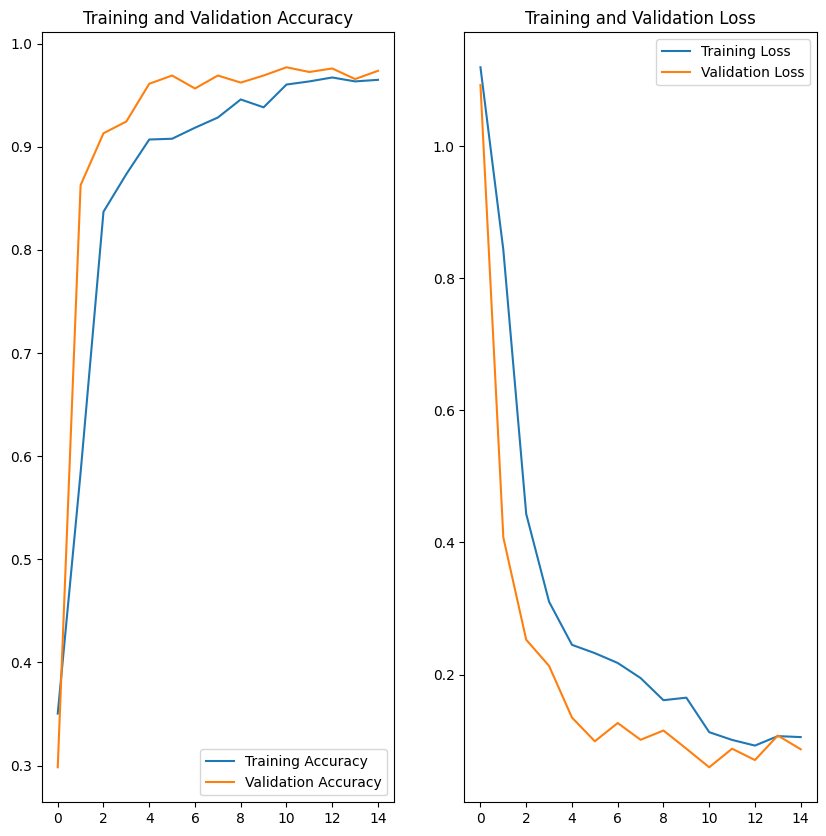

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
random_image = random.sample(os.listdir(paper_direktori), 1)
img = tf.keras.utils.load_img(f"{paper_direktori}/{random_image[0]}", target_size=(180, 180))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 233ms/step
This image most likely belongs to paper with a 99.77 percent confidence.


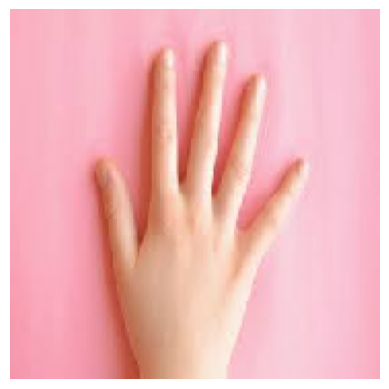

1/1 [==============================] - 0s 49ms/step
This image most likely belongs to class: kertas


In [39]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Load and preprocess the image
img_path = "image/test2.jpeg"
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Perform prediction on the image
classes = model.predict(img_array, batch_size=10)

if np.argmax(classes) == 0:
    print('This image most likely belongs to class: kertas')
elif np.argmax(classes) == 1:
    print('This image most likely belongs to class: batu')
elif np.argmax(classes) == 2:
    print('This image most likely belongs to class: gunting')
else:
    print('Unknown class')